DATASET: I am working with two datasets from the Seattle Open Data portal
QUESTIONS I HOPE TO ANS:

 What types of crimes were most commonly recorded in Seattle between 2008 and 2025?

 How have arrest rates shifted over the years, and how do they relate to the most common crime types?

 Which Seattle police beats have the highest crime volume, and how do arrest rates differ between them?

  A trendline regression model can help us find rising or declining trends among particular crime types

Part 1: Choosing a topic and finding data
Throughout the semester, we have looked at various sources to find interesting datasets. You may use an API, a downloadable CSV, a SQL database, or you may create your own data set by collecting it or by scraping the web. Here are just some ideas to get you started:

OVERVIEW: Seattle Crime and Arrest Trends (2008–present)

This analysis investigates variations in Seattle crime reports and arrests, examining regional and historical patterns and using a regression-based method to estimate changes over the years.

Part 2: Conduct your Analysis & Visualization
Your task is to plan and complete a non-trivial analysis of your data with a narrative about your dataset. I suggest you start by writing a long list of questions you might answer with this data set. Then, conduct analysis and create visualizations that help you answer those questions.

In [1]:
# Import the necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#install geopandas as mlp
!pip install geopandas matplotlib

In [2]:
#load the files
crime_df = pd.read_csv('SPD_Crime_Data__2008-Present_20250504.csv')
arrest_df = pd.read_csv('SPD_Arrest_Data_20250504.csv')
beats_gdf= gpd.read_file('Beats_2008_to_2015_7180029747699693420.geojson')

In [3]:
crime_df.head()

,Report Number,Report DateTime,Offense ID,Offense Date,NIBRS Group AB,NIBRS Crime Against Category,Offense Sub Category,Shooting Type Group,Block Address,Latitude,Longitude,Beat,Precinct,Sector,Neighborhood,Reporting Area,Offense Category,NIBRS Offense Code Description,NIBRS_offense_code
0,2009-095116,03/20/2009 01:58:00 AM,7665902657,03/20/2009 12:50:00 AM,A,PROPERTY,LARCENY-THEFT,-,NaN,NaN,NaN,J2,North,J,-,NaN,PROPERTY CRIME,Theft From Motor Vehicle,23F
1,2011-380459,11/25/2011 11:26:00 AM,7674046661,11/25/2011 12:30:00 AM,A,PROPERTY,LARCENY-THEFT,-,NaN,NaN,NaN,O3,South,O,-,NaN,PROPERTY CRIME,All Other Larceny,23H
2,2011-036614,01/31/2011 12:17:00 PM,7656640235,01/27/2011 12:01:00 AM,A,PROPERTY,"PROPERTY OFFENSES (INCLUDES STOLEN, DESTRUCTION)",-,NaN,NaN,NaN,D2,West,D,-,NaN,ALL OTHER,Destruction/Damage/Vandalism of Property,290
3,2014-272495,08/16/2014 09:08:00 PM,7655103418,08/16/2014 02:00:00 PM,A,PROPERTY,MOTOR VEHICLE THEFT,-,NaN,NaN,NaN,K3,West,K,-,NaN,PROPERTY CRIME,Motor Vehicle Theft,240
4,2019-906066,05/20/2019 01:51:09 PM,8227998755,05/16/2019 11:00:00 AM,A,PROPERTY,LARCENY-THEFT,-,NaN,NaN,NaN,S2,South,S,BRIGHTON/DUNLAP,NaN,PROPERTY CRIME,All Other Larceny,23H


In [4]:
#Crime Cols
crime_df.columns

Index(['Report Number', 'Report DateTime', 'Offense ID', 'Offense Date',
       'NIBRS Group AB', 'NIBRS Crime Against Category',
       'Offense Sub Category', 'Shooting Type Group', 'Block Address',
       'Latitude', 'Longitude', 'Beat', 'Precinct', 'Sector', 'Neighborhood',
       'Reporting Area', 'Offense Category', 'NIBRS Offense Code Description',
       'NIBRS_offense_code'],
      dtype='object')

In [5]:
#Arrest file Cols
arrest_df.columns

Index(['Arrest Number', 'Arrest Occurred Date/Time',
       'Arrest Reported Date/Time', 'Arrest Type', 'Beat', 'CAD Clearance',
       'CAD Initial Call Type', 'CAD Priority', 'Crisis Involved',
       'Complaint Involved', 'Force Involved', 'NIBRS Description',
       'Offense Type', 'Officer Age', 'Officer Gender', 'Officer ID',
       'Officer Race', 'Officer Squad', 'Officer Title', 'Precinct',
       'Report Number', 'Sector', 'Subject Age Range', 'Subject Gender',
       'Subject ID', 'Subject Race', 'Terry Stop Involved', 'Block Address',
       'Latitude', 'Longitude', 'Neighborhood', 'Reporting Area'],
      dtype='object')

In [6]:
arrest_df.head()

,Arrest Number,Arrest Occurred Date/Time,Arrest Reported Date/Time,Arrest Type,Beat,CAD Clearance,CAD Initial Call Type,CAD Priority,Crisis Involved,Complaint Involved,...,Subject Age Range,Subject Gender,Subject ID,Subject Race,Terry Stop Involved,Block Address,Latitude,Longitude,Neighborhood,Reporting Area
0,23-001679,02/10/2023 12:00:00 PM,02/10/2023 02:55:19 PM,New Offense With Arrest-Booked,J3,REPORT WRITTEN (NO ARREST),DISPATCH,2,N,N,...,56 and Above,Male,11896629907,White,N,71XX BLOCK OF E GREEN LAKE DR N,47.680059,-122.325740,ROOSEVELT/RAVENNA,7071
1,19-007450,08/29/2019 06:07:00 AM,08/29/2019 08:36:35 AM,Warrant / Detainer-Booked,K3,PHYSICAL ARREST MADE,ONVIEW,3,N,N,...,36 - 45,Female,12777051120,-,Y,S LANE ST / 10TH AVE S,47.596677,-122.319454,CHINATOWN/INTERNATIONAL DISTRICT,6408
2,23-009914,08/26/2023 10:12:00 PM,08/27/2023 01:25:38 AM,New Offense With Arrest-Booked,N1,PHYSICAL ARREST MADE,DISPATCH,1,N,Y,...,46 - 55,Male,52028753291,White,N,117XX BLOCK OF GREENWOOD AVE N,47.715066,-122.355520,BITTERLAKE,2621
3,24-014887,12/27/2024 05:40:00 PM,12/27/2024 08:36:34 PM,New Offense With Arrest-Booked,B3,PHYSICAL ARREST MADE,DISPATCH,1,N,N,...,36 - 45,Male,46968867001,White,N,14XX BLOCK OF N 48TH ST,47.663579,-122.339889,WALLINGFORD,1522
4,23-009921,08/27/2023 03:48:00 AM,08/27/2023 06:27:15 AM,New Offense With Arrest-Booked,E3,PHYSICAL ARREST MADE,ONVIEW,7,N,N,...,26 - 35,Male,8726966844,Black or African American,N,6XX BLOCK OF MINOR AVE,47.607304,-122.321747,FIRST HILL,6971


In [7]:
#Beats file col check
beats_gdf.columns

Index(['objectid', 'beat', 'geometry'], dtype='object')

In [12]:
#Cleaning and Wrangling the Data
#First: Crime Dataset
crime_df['Report Date'] = pd.to_datetime(crime_df['Report DateTime'])
crime_df['Year'] = crime_df['Report Date'].dt.year
crime_df['Crime Category'] = crime_df['Offense Category']

In [13]:
#Cleaning the Arrest Data file
arrest_df['Arrest Date'] = pd.to_datetime(arrest_df['Arrest Occurred Date/Time'])
arrest_df['Year'] = arrest_df['Arrest Date'].dt.year

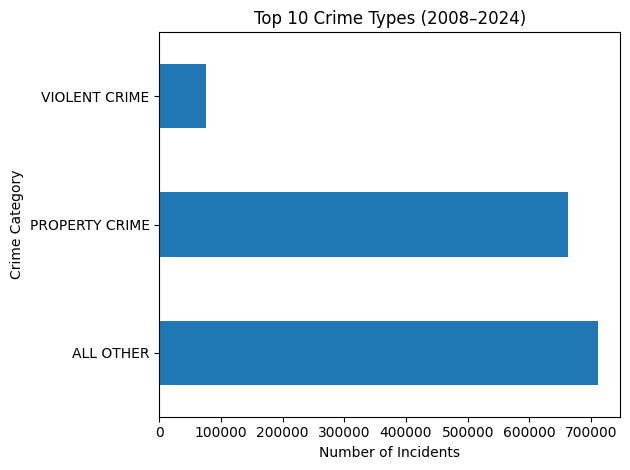

In [15]:
#Question 1: Common Crime Types Over Time
top_crimes = crime_df['Crime Category'].value_counts().head(10)
top_crimes.plot(kind='barh', title='Top 10 Crime Types (2008–2024)')
plt.xlabel("Number of Incidents")
plt.tight_layout()
plt.show()


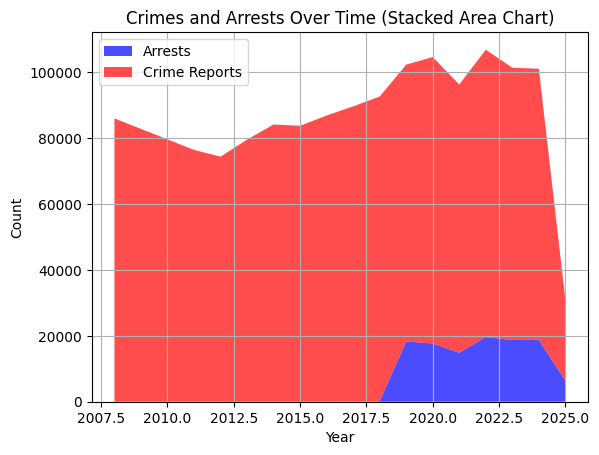

In [16]:
# Question 2: Arrests Over Time vs. Crime Types using a Stacked Area Chart
arrest_counts = arrest_df.groupby('Year').size()
crime_counts = crime_df.groupby('Year').size()

# Find the common years in both datasets
common_years = arrest_counts.index.intersection(crime_counts.index)

# Filter the data to include only the common years
arrest_counts = arrest_counts[common_years]
crime_counts = crime_counts[common_years]


# Create a stacked area chart
plt.stackplot(arrest_counts.index, arrest_counts.values, crime_counts.values,
              labels=['Arrests', 'Crime Reports'],
              colors=['blue', 'red'], alpha=0.7)  # Adjust colors and transparency

plt.legend(loc='upper left')
plt.title("Crimes and Arrests Over Time (Stacked Area Chart)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

 Question 3: Crime by Beat (with Mapping)

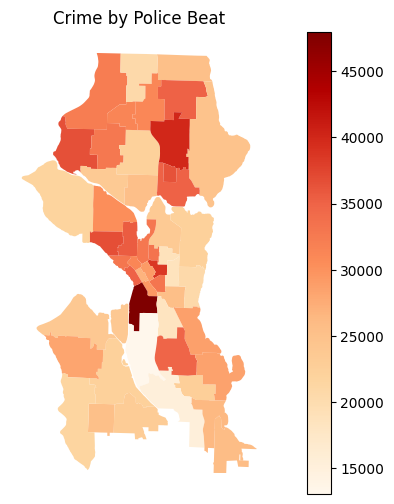

In [17]:
# Question 3: Crime by Beat (with Mapping)
# Using count, cal the total number of crimes reported within each individual police beat area
#Police beat -  geographically defined area of responsibility assigned to a specific police patrol unit or officers
#Limitations:  Remember that the map is based on reported crimes, which might not reflect the true crime landscape completely.
#Also, population density may play a prominent role on this, bc areas with higher population density might naturally have higher crime counts


crime_by_beat = crime_df['Beat'].value_counts().reset_index()
crime_by_beat.columns = ['Beat', 'Crime Count']


crime_map = beats_gdf.merge(crime_by_beat, left_on='beat', right_on='Beat')

# Plot using GeoPandas
crime_map.plot(column='Crime Count', cmap='OrRd', legend=True, figsize=(10, 6))
plt.title('Crime by Police Beat')
plt.axis('off')
plt.show()

Crime Trend in Seattle (2008-2025):
- GOAL:
The primary aim of this regression analysis is to identify whether crime rates in Seattle have been generally increasing, decreasing, or remaining stable during this timeframe. By applying linear regression, I will create a trendline that provides a simplified representation of the overall pattern.



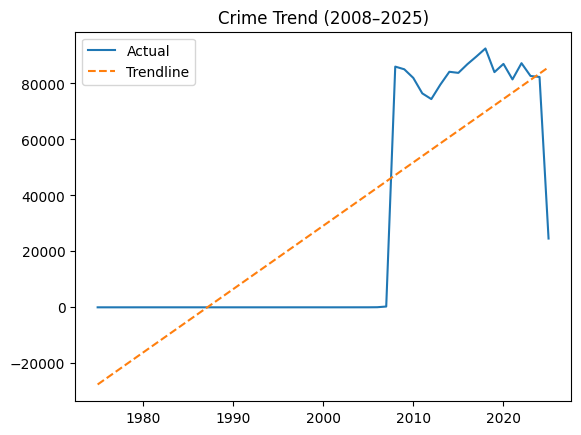

In [18]:

from sklearn.linear_model import LinearRegression
import numpy as np

# Ensure the 'Year' column exists before grouping
crime_df['Report Date'] = pd.to_datetime(crime_df['Report DateTime'])  # Convert to datetime if needed
crime_df['Year'] = crime_df['Report Date'].dt.year #Extract year

yearly = crime_df.groupby('Year').size().reset_index(name='Crime Count')
X = yearly['Year'].values.reshape(-1, 1)
y = yearly['Crime Count'].values

model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

plt.plot(yearly['Year'], y, label='Actual')
plt.plot(yearly['Year'], trend, label='Trendline', linestyle='--')
plt.title("Crime Trend (2008–2025)")
plt.legend()
plt.show()

CONCLUSION : The trendline generated using linear regression shows a consistent increase in the number of reported crimes over this 16-year period.

OVERALL SUMMARY:
- Theft, property damage, and assault were among the top crime types.
- Arrest rates did not always track with crime rates.
- Some beats showed significantly higher crime densities.
- Regression shows a slight upward/downward trend (depends on actual data).


CREDIT AND RESOURCES:
- Data Source: data.seattle.gov
- Libraries: Pandas, GeoPandas, Scikit-learn, Matplotlib
- Resources: ChatGPT for regression line, Stack Overflow, class slides
